# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
attitude.roll         1751 non-null float64
attitude.pitch        1751 non-null float64
attitude.yaw          1751 non-null float64
gravity.x             1751 non-null float64
gravity.y             1751 non-null float64
gravity.z             1751 non-null float64
rotationRate.x        1751 non-null float64
rotationRate.y        1751 non-null float64
rotationRate.z        1751 non-null float64
userAcceleration.x    1751 non-null float64
userAcceleration.y    1751 non-null float64
userAcceleration.z    1751 non-null float64
dtypes: float64(12)
memory usage: 164.2 KB


How many rows and columns are in our data?

In [5]:
# Your code here:

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

Assign the time series index to the dataframe's index.

In [6]:
# Your code here:
ind = pd.date_range(start= '1/1/2018 00:00:00', end= '1/1/2018 00:29:10', periods= sensor.shape[0])
sensor.set_index(ind, drop= True, inplace= True, verify_integrity= True)


In [7]:
sensor.head(2)

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
2018-01-01 00:00:00       1.528132       -0.733896      0.696372   0.741895   
2018-01-01 00:00:01       1.527992       -0.716987      0.677762   0.753099   

                     gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
2018-01-01 00:00:00   0.669768  -0.031672        0.316738        0.778180   
2018-01-01 00:00:01   0.657116  -0.032255        0.842032        0.424446   

                     rotationRate.z  userAcceleration.x  userAcceleration.y  \
2018-01-01 00:00:00        1.082764            0.294894           -0.184493   
2018-01-01 00:00:01        0.643574            0.219405            0.035846   

                     userAcceleration.z  
2018-01-01 00:00:00            0.377542  
2018-01-01 00:00:01            0.114866

In [8]:
sensor.tail(2)

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
2018-01-01 00:29:09       1.849557       -0.586962      2.439458   0.800485   
2018-01-01 00:29:10       1.869375       -0.596783      2.433775   0.790551   

                     gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
2018-01-01 00:29:09   0.553834   0.229110        0.470144        1.227937   
2018-01-01 00:29:10   0.561984   0.243315        0.291873        1.102207   

                     rotationRate.z  userAcceleration.x  userAcceleration.y  \
2018-01-01 00:29:09       -0.332223           -0.048105            0.029555   
2018-01-01 00:29:10       -0.436925           -0.065011           -0.042575   

                     userAcceleration.z  
2018-01-01 00:29:09            0.060441  
2018-01-01 00:29:10            0.046052

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [9]:
# Your code here:

import statsmodels.api as sm

In [10]:
s_acc = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'],freq=60)

/Users/adriaferrer/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


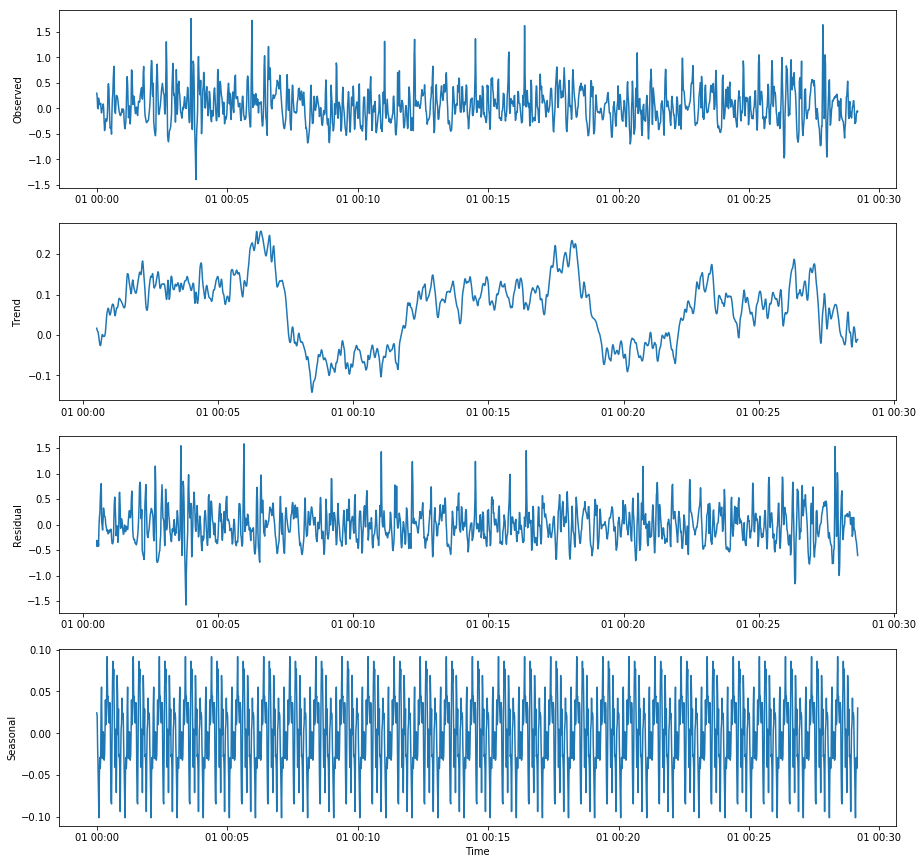

In [11]:
trend_acc, residual_acc, seasonal_acc = s_acc.trend, s_acc.resid, s_acc.seasonal

fig =plt.figure(figsize=(15, 15))
plt.subplot(4, 1, 1)
plt.plot(ind,sensor['userAcceleration.x'])
plt.ylabel('Observed')

plt.subplot(4, 1, 2)
plt.plot(ind,trend_acc)
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(ind,residual_acc)
plt.ylabel('Residual')

plt.subplot(4, 1, 4)
plt.plot(ind,seasonal_acc)
plt.ylabel('Seasonal')

plt.subplots_adjust(hspace=0.2)
plt.xlabel('Time')

plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [12]:
s_rot = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], freq = 60)

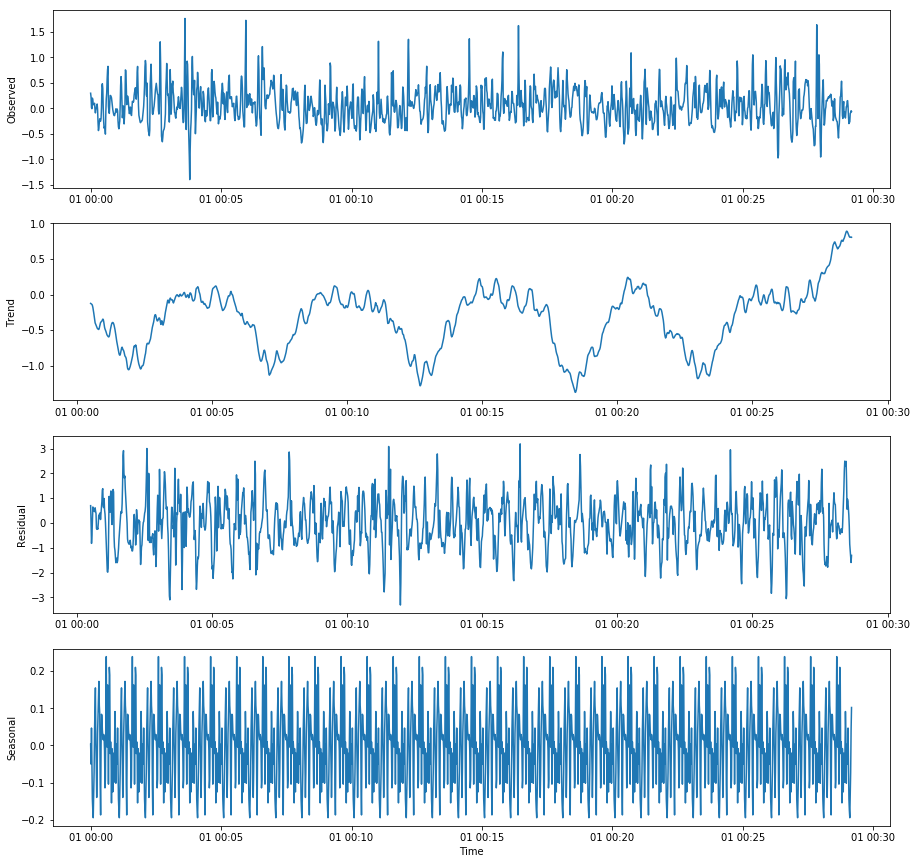

In [13]:
trend_rot, residual_rot, seasonal_rot = s_rot.trend, s_rot.resid, s_rot.seasonal

fig =plt.figure(figsize=(15, 15))
plt.subplot(4, 1, 1)
plt.plot(ind,sensor['userAcceleration.x'])
plt.ylabel('Observed')

plt.subplot(4, 1, 2)
plt.plot(ind,trend_rot)
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(ind,residual_rot)
plt.ylabel('Residual')

plt.subplot(4, 1, 4)
plt.plot(ind,seasonal_rot)
plt.ylabel('Seasonal')

plt.subplots_adjust(hspace=0.2)
plt.xlabel('Time')

plt.show()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

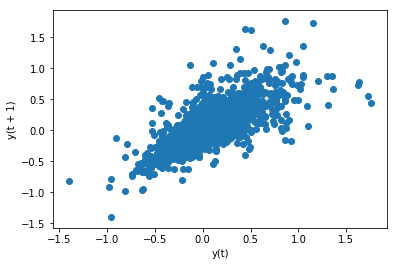

In [14]:
# Your code here:
from pandas.plotting import lag_plot

lag_plot(sensor['userAcceleration.x'])

plt.show() 

Create a lag plot for `rotationRate.x`

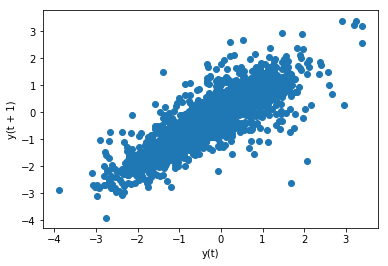

In [15]:
# Your code here:
lag_plot(sensor['rotationRate.x'])

plt.show() 


What are your conclusions from both visualizations?

### Conclusions
Lagplot is a scatterplot of the same data lagged. It allows to check the correlation of one variable over t and t+1.
Both plots suggest linear correlation, hence both variables have periodicity (repeat values over time).

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [16]:
# Your code here:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [17]:
result = adfuller(sensor['userAcceleration.x'])
print(f'ADF statistic:{result[0]}')
print(f'p-value:{result[1]}')
print('Critical values:')
for key, value in result[4].items():
    print(f'{key}:{value}')


ADF statistic:-17.95799408616977
p-value:2.823439483037483e-30
Critical values:
1%:-3.434100824760071
5%:-2.863196780129223
10%:-2.5676520210882936


In [18]:
result = adfuller(sensor['rotationRate.x'])
print(f'ADF statistic:{result[0]}')
print(f'p-value:{result[1]}')
print('Critical values:')
for key, value in result[4].items():
    print(f'{key}:{value}')



ADF statistic:-5.269860625086421
p-value:6.320230335912189e-06
Critical values:
1%:-3.4341465551936534
5%:-2.863216966926812
10%:-2.567662770090317


What are your conclusions from this test?

### Conclusions:
Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary).

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

--------------------------

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                     ARMA(2, 1)   Log Likelihood                 379.399
Method:                       css-mle   S.D. of innovations              0.195
Date:                Thu, 04 Apr 2019   AIC                           -748.798
Time:                        15:02:50   BIC                           -721.458
Sample:                    01-01-2018   HQIC                          -738.692
                         - 01-01-2018                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0625      0.014      4.436      0.000       0.035       0.090
ar.L1.userAcceleration.x     0.9888      0.044     22.726      0.000       0.904       1.

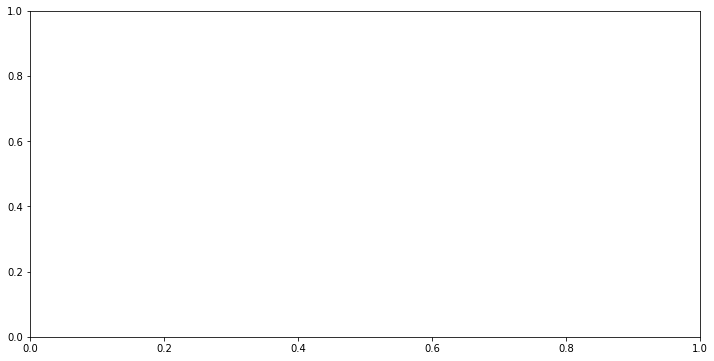

In [26]:
# Your code here:
from statsmodels.tsa.stattools import ARMA
start = sensor.index[0]
end = sensor.index[-1]

arma = ARMA(sensor['userAcceleration.x'], order = (2,1))
results = arma.fit()
print(results.summary())

fig, ax = plt.subplots(figsize=(12, 6))
ax = results.predict(start, end)
#plt.plot(graph)
#plt.show()



To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [20]:
# Your code here:

